## PYLAB 3

Jeff Shen | 1004911526

Stacy Ossipov | 1004877779

3 Feb 2020

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

In [2]:
# reading data
current, _, ucurrent, voltage, _, uvoltage, _ = np.loadtxt('data.csv', skiprows=1, delimiter=',', unpack=True)

# converting current (and its uncertainty) to amps from milliamps
current /= 1000
ucurrent /= 1000

In [3]:
# defining functions

# linear function
def f(x, a, b):
    return a * x + b

# nonlinear function
def g(x, a, b):
    return a * np.power(x, b)

# theoretical function. will use scaling factor from curve fit later. 
def t(x):
    return np.power(x, 0.5882) 

# reduced chi squared function
def rcs(pred, target, uncertainty, n_params):
    return np.square((pred - target) / uncertainty).sum() / (pred.size - n_params)

In [4]:
# curve fit to linear function
popt, pcov = curve_fit(f, np.log(voltage), np.log(current), sigma=ucurrent, absolute_sigma=True)
print(f'parameters of linear model: {popt}\nuncertainties: {np.sqrt(np.diag(pcov))}\n')

parameters of linear model: [ 0.55198273 -5.03575564]
uncertainties: [3.18655404e-05 5.25137566e-05]



In [5]:
# fitting nonlinear function
popt2, pcov2 = curve_fit(g, voltage, current, sigma=ucurrent, absolute_sigma=True)
print(f'parameters of nonlinear model: {popt2}\nuncertainties: {np.sqrt(np.diag(pcov2))}') 

parameters of nonlinear model: [0.00628338 0.57024502]
uncertainties: [3.25652871e-05 2.10005714e-03]


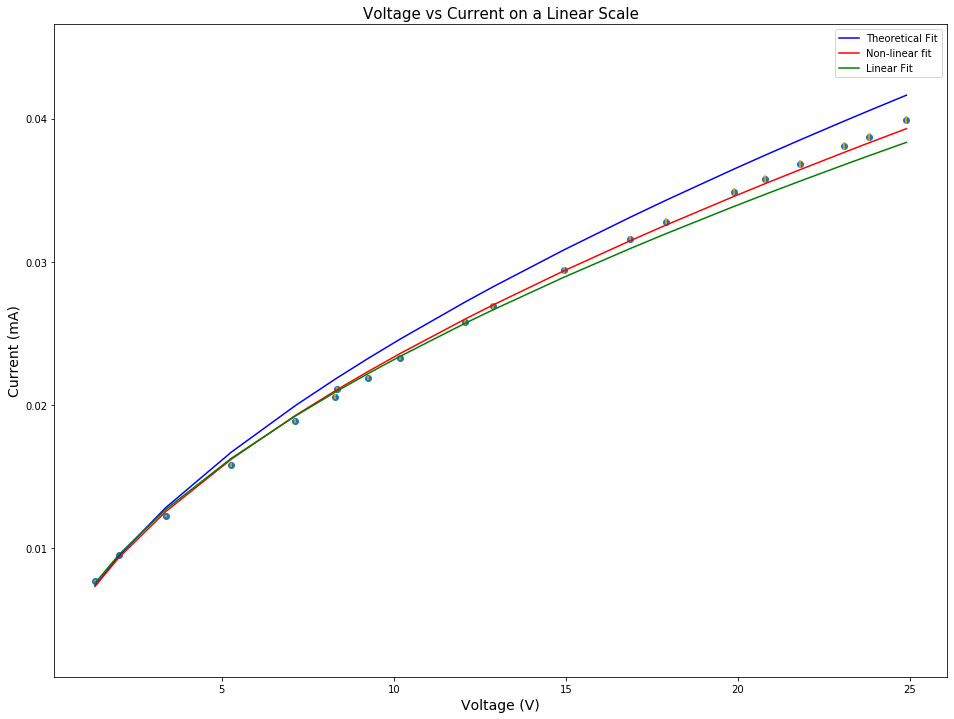

In [6]:
# linear, nonlinear, and theoretical curves on a linear scale. 
plt.figure(figsize=(16, 12))
plt.scatter(voltage, current)
plt.plot(voltage, popt2[0] * t(voltage), c='b', label='Theoretical Fit')
plt.plot(voltage, g(voltage, *popt2), c='r', label='Non-linear fit')
plt.plot(voltage, np.exp(f(np.log(voltage), *popt)), c='g', label='Linear Fit')
plt.errorbar(voltage, current, ucurrent, c='orange', ls='')
plt.legend()
plt.title('Voltage vs Current on a Linear Scale', fontsize=(15))
plt.xlabel('Voltage (V)', fontsize=14)
plt.ylabel('Current (mA)', fontsize=14)
plt.savefig('voltage_current_linear.png')

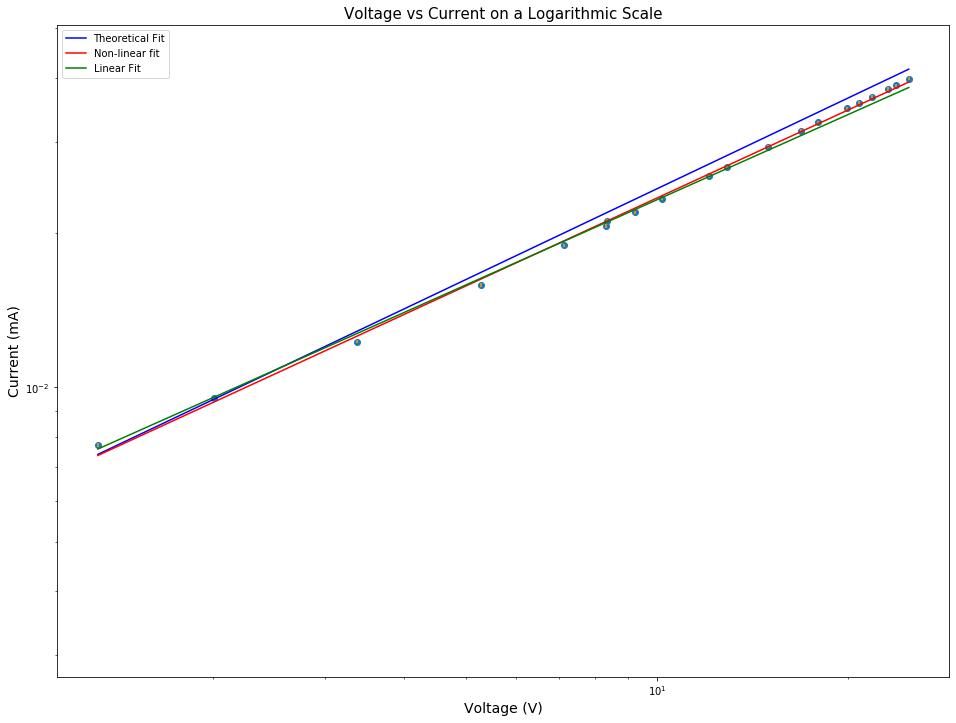

In [7]:
# linear, nonlinear, and theoretical curves on a logarithmic scale. 
plt.figure(figsize=(16, 12))
plt.scatter(voltage, current)
plt.plot(voltage, popt2[0] * t(voltage), c='b', label='Theoretical Fit')
plt.plot(voltage, g(voltage, *popt2), c='r', label='Non-linear fit')
plt.plot(voltage, np.exp(f(np.log(voltage), *popt)), c='g', label='Linear Fit')
plt.errorbar(voltage, current, ucurrent, c='orange', ls='')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.title('Voltage vs Current on a Logarithmic Scale', fontsize=(15))
plt.xlabel('Voltage (V)', fontsize=14)
plt.ylabel('Current (mA)', fontsize=14)
plt.savefig('voltage_current_log.png')

In [8]:
# reduced chi squared of fits
print(f'linear model: {rcs(np.exp(f(np.log(voltage), *popt)), current, ucurrent, 2):.3f}')
print(f'non-linear model: {rcs(g(voltage, *popt2), current, ucurrent, 2):.3f}')

linear model: 11.350
non-linear model: 5.831
